In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
Citations = '''
  select *
  from    [dbo].[spd_PDCitations$]  
  '''
Citations = pd.read_sql(Citations, connection)
connection.close()

#filter for only citations of type 'DUI'
DUI_Citations = Citations.loc[Citations['Charge Description'].str.contains('DUI')]

#filter for only citations of the type 'DUI-BAC'
DUI_Citations_BAC = Citations.loc[Citations['Charge Description'].str.contains('DUI-BAC')]
DUI_Citations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 139 to 35751
Data columns (total 22 columns):
tcmainid                     1878 non-null float64
Citation #                   1878 non-null float64
Citation Date                1878 non-null datetime64[ns]
Citation Time                1878 non-null float64
Arizona Statute Code         1878 non-null object
Charge Description           1878 non-null object
Citation Type Code           1878 non-null object
Citation Type Description    1878 non-null object
Officer Badge #              1878 non-null float64
Street Number                1878 non-null object
Street                       1878 non-null object
City                         1876 non-null object
State                        1875 non-null object
Zip                          35 non-null float64
District                     1837 non-null object
Beat                         1868 non-null float64
Zone                         1878 non-null float64
Cited Person               

In [2]:
DUI_Citations.head()

tcmainid  Citation # Citation Date  Citation Time Arizona Statute Code  \
139  593514.0   8086992.0    2017-10-26         2106.0            28-1381A1   
223  629613.0   2065106.0    2018-09-02         1849.0            28-1381A1   
227  629661.0   2065108.0    2018-09-03          208.0            28-1381A1   
229  629731.0   2065110.0    2018-09-03         1951.0            28-1381A2   
248  590952.0   2045400.0    2017-10-06         2230.0            28-1381A1   

                   Charge Description Citation Type Code  \
139  DUI-Impaired to Slightest Degree                 CT   
223  DUI-Impaired to Slightest Degree                 CT   
227  DUI-Impaired to Slightest Degree                 CT   
229            DUI-BAC of .08 or More                 CR   
248  DUI-Impaired to Slightest Degree                 CT   

    Citation Type Description  Officer Badge # Street Number  \
139          Criminal Traffic            826.0          1xxx   
223          Criminal Traffic            515.0          8xxx   
227          Criminal Traffic            515.0          7xxx   
229                  Criminal            515.0          4xxx   
248          Criminal Traffic            515.0          7xxx   

             ...           State Zip District  Beat    Zone  \
139          ...              AZ NaN       D4  15.0  3601.0   
223          ...              AZ NaN       D2   5.0   907.0   
227          ...              AZ NaN       D2   6.0   809.0   
229          ...            None NaN     None   NaN     0.0   
248          ...              AZ NaN       D2   6.0  1104.0   

          Cited Person  Cited Person Age Cited Person Race  Cited Person Sex  \
139        Mahon, JOhn              34.0                 W                 M   
223      Towns, Robert              56.0                 B                 M   
227  Lofthouse, Garret              21.0                 W                 M   
229      Omole, Eniola              25.0                 B                 M   
248        Berg, Rayna              42.0                 W                 F   

    Cited Person Ethnicity  
139                      N  
223                      N  
227                      N  
229                      N  
248                      N  

[5 rows x 22 columns]

In [37]:
#how many different types of DUI citations are there?
DUI_Citations['Charge Description'].groupby(DUI_Citations['Charge Description']).count()

Charge Description
DUI-BAC of .08 or More                152
DUI-Drugs or Metabolite (13-3401)      29
DUI-Impaired to Slightest Degree     1648
Extreme DUI-BAC .15 or More            37
Extreme DUI-BAC .20 or More            12
Name: Charge Description, dtype: int64

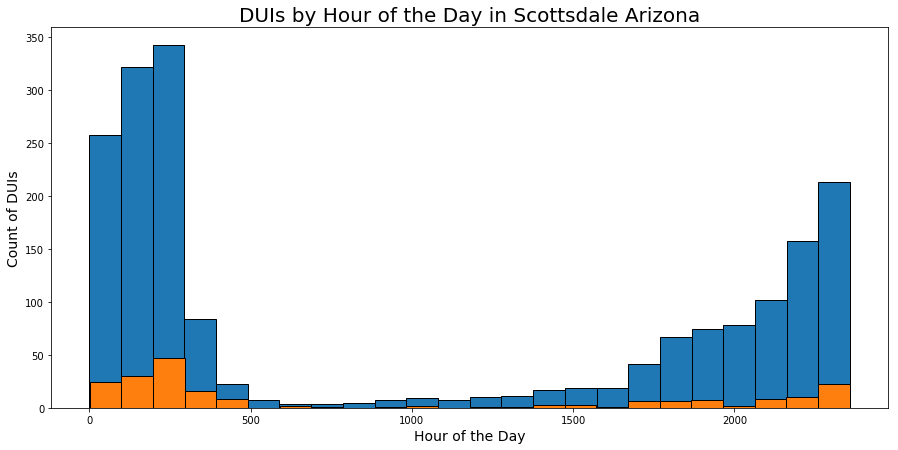

In [38]:
plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size of the histogram
plt.title("DUIs by Hour of the Day in Scottsdale Arizona",fontsize=20)
plt.xlabel("Hour of the Day",fontsize=14)
plt.ylabel("Count of DUIs",fontsize=14)

with plt.style.context('default'):
    plt.hist(DUI_Citations['Citation Time'],bins=24,histtype='bar',edgecolor='black')
    plt.hist(DUI_Citations_BAC['Citation Time'],bins=24,histtype='bar',edgecolor='black')
plt.show()

#DUI citations in total contrasted against those with a BAC greater than .08%
#a relatively small proportion are made up of BAC greater than .08%

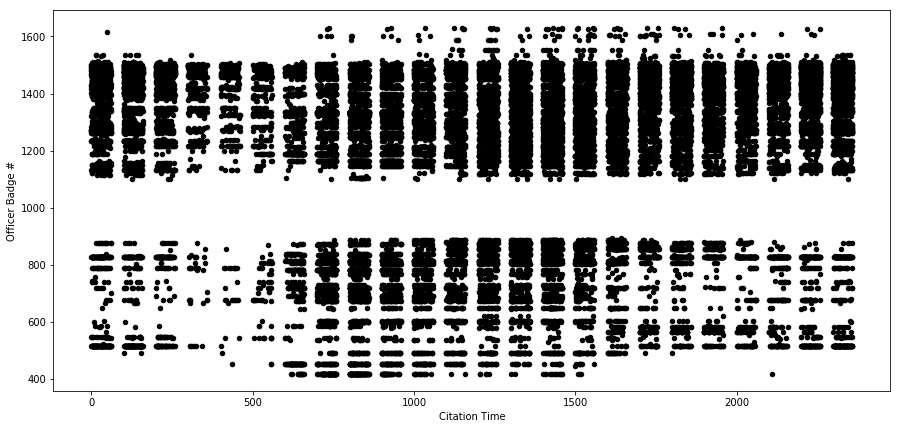

In [34]:
plt.rcParams["figure.figsize"] = [15, 7] 

Citations.plot(x = 'Citation Time', y = 'Officer Badge #', kind = 'scatter', color='black')

# why is there a jump in officer badge numbers from about 850 to 1100?  
# are officer badge numbers issued sequentially by the Scottsdale Police Department?
# the smaller number of citations in the lower badge numbers makes me think badges are issued sequentially
# more senior officers seem to issue more citations during daytime hours

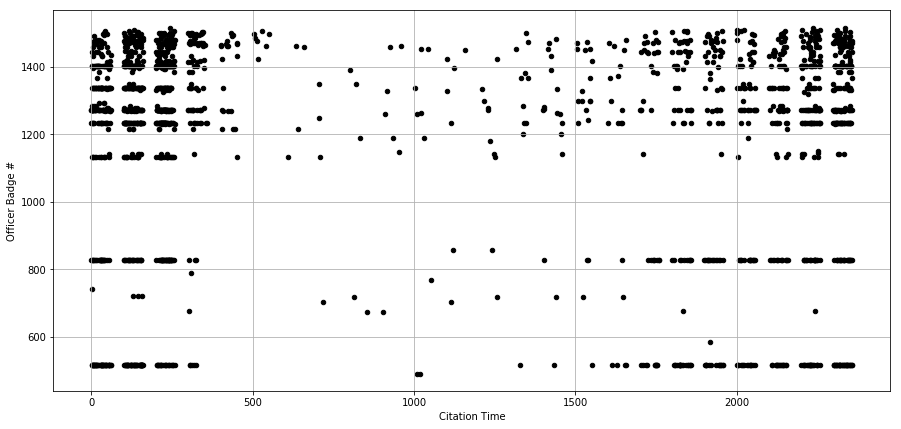

In [31]:
#scatterplot of only DUI citations

plt.rcParams["figure.figsize"] = [15, 7] 

DUI_Citations.plot(x = 'Citation Time', y = 'Officer Badge #', kind = 'scatter', color='black')
plt.grid()

# it seems younger officers are patrolling for DUIs more heavily
# or is it that DUIs take place at late night hours, older officers have seniority to not work those shifts?
# it seems DUI citations are disproportionately enforced by junior officers

In [13]:
# opens SQL query directly in Python, rather than open from CSV
 
import pyodbc
import pandas as pd
# datetime for date computer date

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to find the percent of DUIs that take place at each intersection
DUILocations = '''
  select 
	 A.[Street]
	 ,A._Count_
	 ,convert(varchar,
			round(
				 convert(float, A._Count_)/convert(float, B._Total_)*100
				 ,2
			 )
	 ) + '%'as _Percent_
  from    (
		  select 
	      [Street]
		  ,count([Charge Description]) as _Count_
		  from [dbo].[spd_PDCitations$]
		  where [Charge Description] like '%DUI%'
		  group by [Street]
		  
  ) as A

  cross join  (
				select 
			    sum(_Count_) as _Total_
			    from (
				
				  select 
					[Street]
	               ,count([Charge Description]) as _Count_
                   from [dbo].[spd_PDCitations$]
                   where [Charge Description] like '%DUI%'
                   group by [Street]) as C  --interestingly an alias is needed here, even though I'm not calling the alias anywhere else in the querry
 ) as B 
			   
  group by A.[Street], A._Count_, (convert(float, A._Count_)/convert(float, B._Total_)*100)
  
  '''

# save the sql query to a pandas dataframe, or excel like sheet
DUILocations = pd.read_sql(DUILocations, connection)
connection.close()

                               Street  _Count_ _Percent_
128                E Indian School Rd      202     10.76
434                   N Scottsdale Rd      138      7.35
54                     E Camelback Rd       91      4.85
391  N Hayden Rd / E Indian School Rd       59      3.14
389                       N Hayden Rd       56      2.98
200                         E Shea Bl       54      2.88
159                     E McDowell Rd       43      2.29
62   E Camelback Rd / N Scottsdale Rd       28      1.49
415                       N Miller Rd       28      1.49
131  E Indian School Rd / N Miller Rd       25      1.33


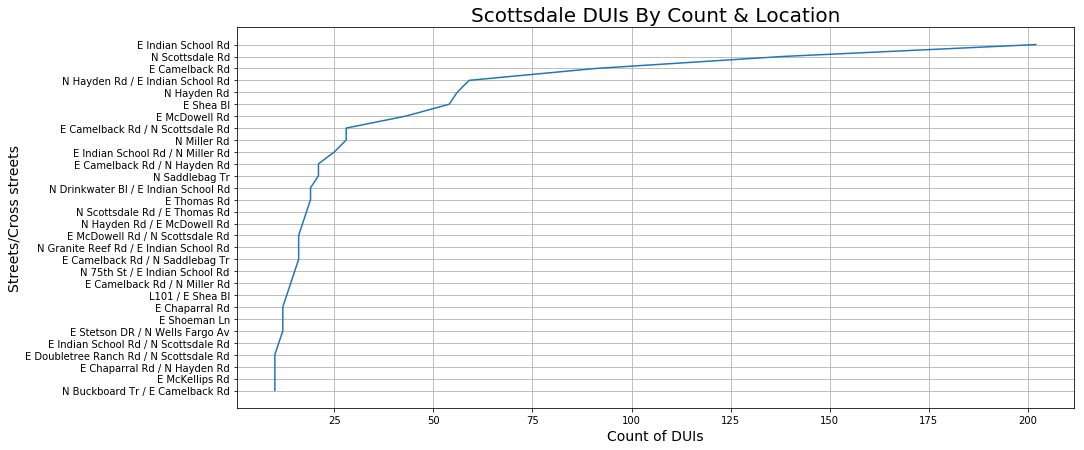

In [15]:
#Plot streets and count of DUIs across Scottsdale
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#remove percent character on the end of '_Percent_' field
DUILocations['_Percent_']= DUILocations['_Percent_'].str.replace('%','')

print(DUILocations.sort_values(['_Count_'], ascending=[0]).head(10))

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("Scottsdale DUIs By Count & Location",fontsize=20)
plt.xlabel("Count of DUIs",fontsize=14)
plt.ylabel("Streets/Cross streets",fontsize=14)


top30 = DUILocations.sort_values(['_Count_'], ascending=[0]).head(30)
y = top30.sort_values(['_Count_'], ascending=[1]).loc[:,'_Count_'] 
x = top30.sort_values(['_Count_'], ascending=[1]).loc[:,'Street']
plt.plot(y,x)
plt.grid()